### Import all the required libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wget
import os
import cv2
from random import randint

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

### Unzip the dataset to use in our notebook

In [3]:
directory = 'gemstones/train/'

In [4]:
#printing all the gemstone categories present in our dataset
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Zoisite', 'Sunstone', 'Hessonite', 'Andradite', 'Iolite', 'Andalusite', 'Sapphire Pink', 'Serpentine', 'Variscite', 'Emerald', 'Ruby', 'Sapphire Yellow', 'Prehnite', 'Carnelian', 'Aventurine Green', 'Chalcedony', 'Onyx Red', 'Rhodochrosite', 'Peridot', 'Topaz', 'Chrome Diopside', 'Spinel', 'Ametrine', 'Quartz Beer', 'Larimar', 'Chrysoberyl', 'Tigers Eye', 'Dumortierite', 'Spodumene', 'Alexandrite', 'Quartz Rose', 'Chrysoprase', 'Morganite', 'Blue Lace Agate', 'Quartz Smoky', 'Diamond', 'Lapis Lazuli', 'Cats Eye', 'Aventurine Yellow', 'Danburite']
40


### Map and display all the categories present in our dataset. There are total 68 different kinds of gemstones.

In [5]:
gems_map = dict(zip(Name, [t for t in range(len(Name))]))
print(gems_map)
r_gems_map=dict(zip([t for t in range(len(Name))],Name)) 

{'Zoisite': 0, 'Sunstone': 1, 'Hessonite': 2, 'Andradite': 3, 'Iolite': 4, 'Andalusite': 5, 'Sapphire Pink': 6, 'Serpentine': 7, 'Variscite': 8, 'Emerald': 9, 'Ruby': 10, 'Sapphire Yellow': 11, 'Prehnite': 12, 'Carnelian': 13, 'Aventurine Green': 14, 'Chalcedony': 15, 'Onyx Red': 16, 'Rhodochrosite': 17, 'Peridot': 18, 'Topaz': 19, 'Chrome Diopside': 20, 'Spinel': 21, 'Ametrine': 22, 'Quartz Beer': 23, 'Larimar': 24, 'Chrysoberyl': 25, 'Tigers Eye': 26, 'Dumortierite': 27, 'Spodumene': 28, 'Alexandrite': 29, 'Quartz Rose': 30, 'Chrysoprase': 31, 'Morganite': 32, 'Blue Lace Agate': 33, 'Quartz Smoky': 34, 'Diamond': 35, 'Lapis Lazuli': 36, 'Cats Eye': 37, 'Aventurine Yellow': 38, 'Danburite': 39}


In [6]:
img_w, img_h = 100, 100

### Create functions to read images and labels of gemstones from the training dataset.

In [7]:
#function which reads images and class names
def read_images():
    Images, Labels = [], []
    for root, dirs, files in os.walk('gemstones/train/'):
        f = os.path.basename(root)        
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w), int(img_h)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images,Labels)

In [8]:
#function which converts string labels to numbers
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(Name):    
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels           

### Read images and labels from the training set.

In [9]:
Train_Imgs, Train_Lbls = read_images()
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (1303, 100, 100, 3)
Shape of train labels: (1303,)


### Split the training dataset into train and validation sets.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (1042, 100, 100, 3), y_train: (1042,) 
Shape of X_val: (261, 100, 100, 3), y_val: (261,) 


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation,BatchNormalization, AveragePooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

### Create a sequential model.

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(len(gems_map)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Perform data augmentation on the images so that we can achieve more relevant data.

In [15]:
train_datagen = ImageDataGenerator(vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

val_datagen = ImageDataGenerator()

In [16]:
batch_size = 2

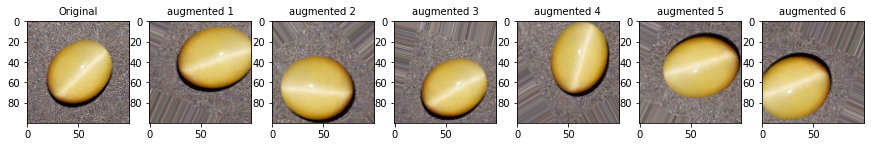

In [17]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [18]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [19]:
EPOCHS = 25                           
iter_per_epoch = len(X_train) // batch_size  
val_per_epoch = len(X_val) // batch_size     

### Train the sequential model.

In [20]:
m = model.fit(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS, 
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 
       )

Epoch 1/25
521/521 [==============================] - 64s 118ms/step - loss: 3.7434 - accuracy: 0.0547 - val_loss: 3.2142 - val_accuracy: 0.1192
Epoch 2/25
521/521 [==============================] - 58s 111ms/step - loss: 3.2028 - accuracy: 0.0940 - val_loss: 2.9744 - val_accuracy: 0.1077
Epoch 3/25
521/521 [==============================] - 58s 111ms/step - loss: 3.0740 - accuracy: 0.1084 - val_loss: 2.7529 - val_accuracy: 0.1423
Epoch 4/25
521/521 [==============================] - 58s 111ms/step - loss: 2.8861 - accuracy: 0.1315 - val_loss: 3.2019 - val_accuracy: 0.0731
Epoch 5/25
521/521 [==============================] - 57s 110ms/step - loss: 2.8157 - accuracy: 0.1248 - val_loss: 2.6400 - val_accuracy: 0.1923
Epoch 6/25
521/521 [==============================] - 59s 114ms/step - loss: 2.6041 - accuracy: 0.1852 - val_loss: 2.4416 - val_accuracy: 0.1615
Epoch 7/25
521/521 [==============================] - 58s 111ms/step - loss: 2.5493 - accuracy: 0.1919 - val_loss: 2.3548 - val_ac

### Plot accuracy and loss graphs to evaluate the performance of our model.

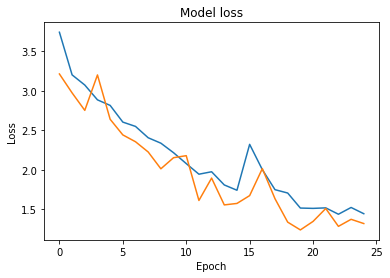

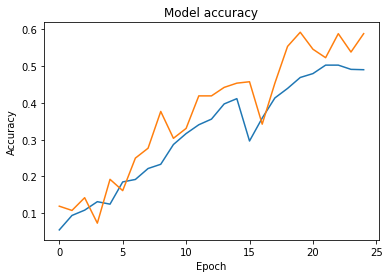

In [21]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.show()

plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.show()

### Make predictions on random images from the test set.

/home/nehasoni/anaconda3/envs/tts_ori/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


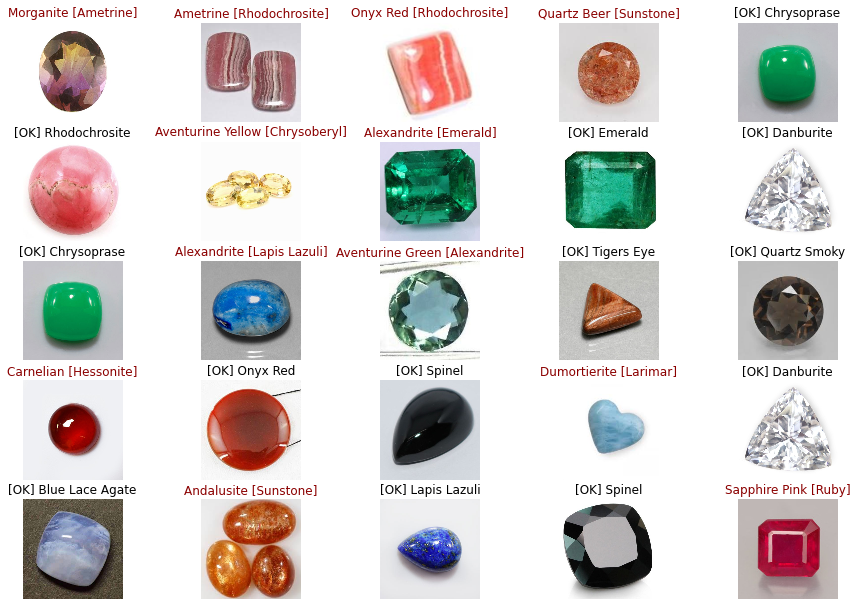

In [24]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Test_Imgs))
        pred_image = np.array([Test_Imgs[rnd_number]])
        pred_class = model.predict_classes(pred_image)[0]
        pred_prob = model.predict(pred_image).reshape(40)
        act =Name[Test_Lbls[rnd_number]]
        ax[i,j].imshow(Test_Imgs[rnd_number])
        ax[i,j].imshow(pred_image[0])
        if(Name[pred_class] != Name[Test_Lbls[rnd_number]]):
            t = '{} [{}]'.format(Name[pred_class], Name[Test_Lbls[rnd_number]])
            ax[i,j].set_title(t, fontdict={'color': 'darkred'})
        else:
            t = '[OK] {}'.format(Name[pred_class]) 
            ax[i,j].set_title(t)
        ax[i,j].axis('off')

### Images with [OK] are the correctly classified images.

In [25]:
model.save('saved_models/gemstone.tf')
model.save('saved_models/gemstone.h5')

INFO:tensorflow:Assets written to: saved_models/gemstone.tf/assets


### TFLite Conversion

In [29]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('saved_models/gemstone.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpf4cqutjh/assets
